#### Importing required libraries


In [330]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests

#### Next, we will fetch the image from the internet that we will be working on. We will then resize the image and convert it into a NumPy array.

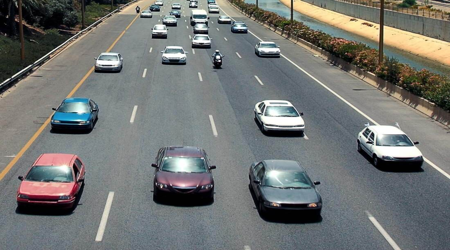

In [331]:
image = Image.open(requests.get('https://marvel-b1-cdn.bc0a.com/f00000000027094/ix-cdn.b2e5.com/images/27094/27094_3063d356a3a54cc3859537fd23c5ba9d_1539205710.jpeg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

#### To get better output, we will perform some transformations on the image. Here we will convert the image into grayscale

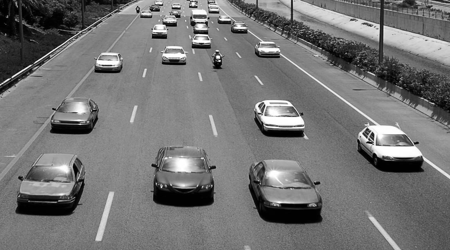

In [332]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

#### Next, we will apply GaussianBlur to remove the noise from the image. Gaussian blur is one of the techniques of image processing. It is widely used in graphics designing too for reducing the noise and smoothing the image so that for further preprocessing, it will generate better output. Along with reducing the noise in the image Gaussian blur technique also reduces the image’s details. Here for applying this preprocessing technique, we will be using the GaussianBlur function().

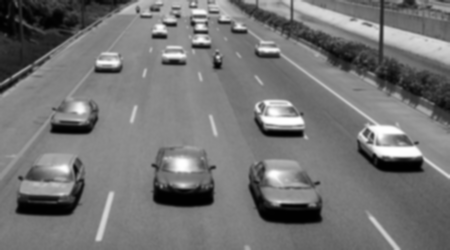

In [333]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

#### Here we will dilate the image. Dilation is one of the morphological techniques where we try to fill the pixels with the element, also known as kernels (structured pieces), to fill the missing parts of the images whenever needed.

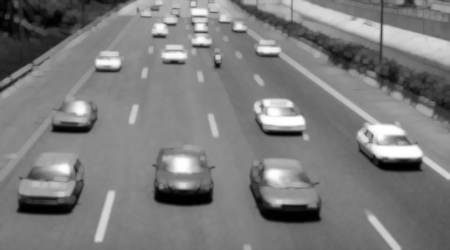

In [334]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

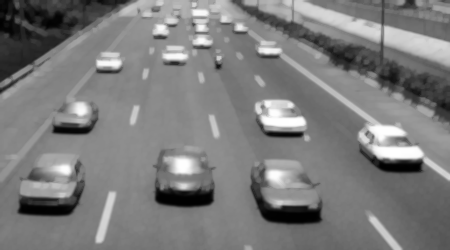

In [335]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [336]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 2.1, 1)
cars

array([[ 28,  75,  88,  88],
       [153,  36,  42,  42],
       [139, 144,  88,  88],
       [  2, 159,  88,  88],
       [247, 160,  88,  88]])

5  cars found


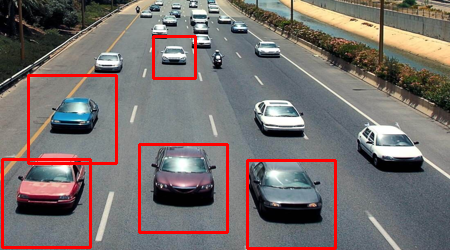

In [337]:
cnt = 0
for (x,y,w,h) in cars:
    cnt += 1
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    
print(cnt, " cars found")
Image.fromarray(image_arr)

Open with video

In [339]:
video_capture = cv2.VideoCapture('SnapSave.io-Highway Free footage(720p).mp4')
cnt = 0

if not video_capture.isOpened():
    print("Erro ao abrir o vídeo")
else: 
    while video_capture.isOpened():
        # Ler o próximo quadro
        ret, frame = video_capture.read()

        # Verificar se o quadro foi lido corretamente
        if not ret:
            break

        # Processar o quadro
        grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(grey, (5, 5), 0)
        dilated = cv2.dilate(blur, np.ones((3, 3)))
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
        closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
        car_cascade_src = 'cars.xml'
        car_cascade = cv2.CascadeClassifier(car_cascade_src)
        cars = car_cascade.detectMultiScale(closing, 3.2, 1)

        for (x, y, w, h) in cars:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cnt += 1

        # Adicionar o contador na imagem
        cv2.putText(frame, 'Cars: ' + str(cnt), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Mostrar o quadro
        cv2.imshow('Video', frame)

        # Verificar se a tecla 'q' foi pressionada para sair do loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()
